In [66]:
import sys
sys.path.append('../ptitprince/')
from collections import namedtuple
Circle = namedtuple("Circle", "x y r")
import pandas as pd
import numpy as np
import scipy as sp
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import time
from matplotlib.lines import Line2D
from math import log10
import math
from scipy.spatial.distance import pdist, squareform
from matplotlib.patches import Patch
import matplotlib.lines as mlines
from matplotlib import colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import os.path
import csv
import gc
import copy
import os

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [75]:
DATA_DIR="/home/somz/connectivity/results_cc"
robots = [15,30,60]
seeds = [i for i in range(1,6)]

In [76]:
def get_name(n_robot,seed):
    fname = DATA_DIR +'/'+'perf_line_'+str(n_robot)+'_'+str(seed)+'.txt'
    print(fname)
    return fname

In [77]:
max_val_ = [0,0,0]
final_df = np.zeros(((3,6)),dtype=object)

exp_done = []
result = [[],[],[]]
max_df = [[],[],[]]

df2 = pd.DataFrame(columns=["time", "numones", "numtwoes", "lambda2_tree","lambda2_graph","tree_done","experiment_done","seed","number_of_robot"])

for n_i,n_robot in enumerate(robots):
    for seed_i,seed in enumerate(seeds):
        fname = get_name(n_robot,seed)
        data = pd.read_csv(fname, sep=",", header=None)
        data.columns = ["time", "numones", "numtwoes", "lambda2_tree","lambda2_graph","tree_done","experiment_done","seed","number_of_robot"]
        df = pd.DataFrame(data=data)
        df['time'] = df['time']/10
        x = df.loc[df['tree_done'] == 1].iloc[0]
        x['experiment_done'] = 0
        df2 = df2.append(x,ignore_index=True)
        df2['number_of_robot'] = df2['number_of_robot'].astype('int')
        
        if max_val_[n_i] < df.shape[0]: 
           max_df[n_i] = df  
           max_val_[n_i] = df.shape[0]
        final_df[n_i][seed] = df
        exp_done.append(df)




for n_i,n_robot in enumerate(robots):
    for seed_i,seed in enumerate(seeds):
        if (max_val_[n_i] - final_df[n_i][seed].shape[0]) > 0:
           length = max_val_[n_i] - final_df[n_i][seed].shape[0]
           #print("max_size: ",str(max[n_i]))
           #print("intiallength: ",str(df.shape[0]))
           #print("length: ",str(length))
           final_df[n_i][seed] = pd.concat([final_df[n_i][seed],pd.concat([final_df[n_i][seed][-1:]]*length)])
           final_df[n_i][seed]['time'] = max_df[n_i]['time'].values
           final_df[n_i][seed]  = final_df[n_i][seed].reset_index(drop=True)
           #print("finallength: ",str(df.shape[0]))

exp_done = pd.concat(exp_done)    
        

/home/somz/connectivity/results_cc/perf_line_15_1.txt
/home/somz/connectivity/results_cc/perf_line_15_2.txt
/home/somz/connectivity/results_cc/perf_line_15_3.txt
/home/somz/connectivity/results_cc/perf_line_15_4.txt
/home/somz/connectivity/results_cc/perf_line_15_5.txt
/home/somz/connectivity/results_cc/perf_line_30_1.txt
/home/somz/connectivity/results_cc/perf_line_30_2.txt
/home/somz/connectivity/results_cc/perf_line_30_3.txt
/home/somz/connectivity/results_cc/perf_line_30_4.txt
/home/somz/connectivity/results_cc/perf_line_30_5.txt


/tmp/ipykernel_89215/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(x,ignore_index=True)
/tmp/ipykernel_89215/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(x,ignore_index=True)
/tmp/ipykernel_89215/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(x,ignore_index=True)
/tmp/ipykernel_89215/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(x,ignore_index=True)
/tmp/ipykernel_89215/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

/home/somz/connectivity/results_cc/perf_line_60_1.txt
/home/somz/connectivity/results_cc/perf_line_60_2.txt
/home/somz/connectivity/results_cc/perf_line_60_3.txt
/home/somz/connectivity/results_cc/perf_line_60_4.txt
/home/somz/connectivity/results_cc/perf_line_60_5.txt


/tmp/ipykernel_89215/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(x,ignore_index=True)
/tmp/ipykernel_89215/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(x,ignore_index=True)
/tmp/ipykernel_89215/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(x,ignore_index=True)
/tmp/ipykernel_89215/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(x,ignore_index=True)
/tmp/ipykernel_89215/2091943441.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [81]:
result[0] = pd.concat(final_df[0][1:6])

In [82]:
result[0]

,time,numones,numtwoes,lambda2_tree,lambda2_graph,tree_done,experiment_done,seed,number_of_robot
0,0.1,7,4,0.123447,0.576686,0,0,1,15
1,0.2,7,4,0.123447,0.576686,0,0,1,15
2,0.3,7,4,0.123447,0.576686,0,0,1,15
3,0.4,7,4,0.123447,0.576686,0,0,1,15
4,0.5,7,4,0.123447,0.576686,0,0,1,15
...,...,...,...,...,...,...,...,...,...
19295,1929.6,2,13,0.043705,0.043705,1,1,5,15
19296,1929.7,2,13,0.043705,0.043705,1,1,5,15
19297,1929.8,2,13,0.043705,0.043705,1,1,5,15
19298,1929.9,2,13,0.043705,0.043705,1,1,5,15


In [5]:
pal=["darkblue","cyan","darkorange","red","green"]

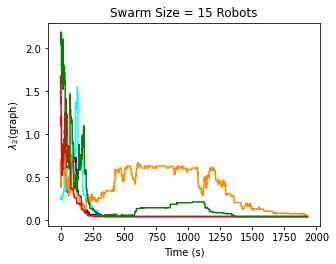

In [6]:

f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 15 Robots")

result[0] = pd.concat(final_df[0][1:6])
result[0] = result[0].reset_index(drop=True)

sns.lineplot(data=result[0],x='time',y='lambda2_graph',ci=None,hue='seed',legend=None,palette=pal)

# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:6],['initial condition-1','initial condition-2','initial condition-3','initial condition-4','initial condition-5'] ,loc="upper left",framealpha=0.4,fontsize=11)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("$\lambda_2$(graph) ",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/15_line_lambda2_graph.pdf", dpi=600, format="pdf", transparent=False)



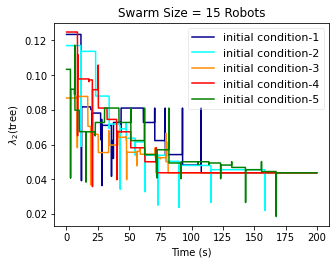

In [7]:
pal=["darkblue","cyan","darkorange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 15 Robots")

for i in range(1,6):
     final_df[0][i].drop(final_df[0][i][(final_df[0][i]['lambda2_tree'] <= 0) | (final_df[0][i]['time'] >= 200)].index,inplace=True)
    # legend = str(i) + "-" + "seed"

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("$\lambda_2$(tree)",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)



result[0] = pd.concat(final_df[0][1:6])
result[0] = result[0].reset_index(drop=True)
sns.lineplot(data=result[0],x='time',y='lambda2_tree',ci=None,hue='seed',palette=pal,ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:6],['initial condition-1','initial condition-2','initial condition-3','initial condition-4','initial condition-5'] ,loc="upper right",framealpha=0.4,fontsize=11)


plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/15_line_lambda2_tree.pdf", dpi=600, format="pdf", transparent=False)
    


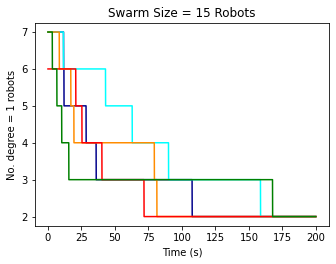

In [8]:

f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 15 Robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("No. degree = 1 robots",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=result[0],x='time',y='numones',ci=None,hue='seed',palette=pal,legend=None)
# ax.set(xlabel=None)
# sns.lineplot(data=result[0],x='time',y='numtwoes',ci=None,hue='seed',palette=pal,legend=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/15_line_numones.pdf", dpi=600, format="pdf", transparent=False)



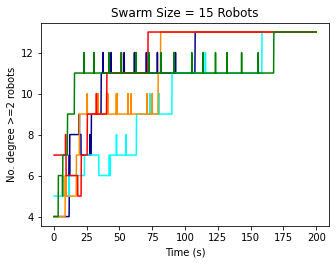

In [9]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 15 Robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("No. degree >=2 robots",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=result[0],x='time',y='numtwoes',ci=None,hue='seed',palette=pal,legend=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/15_line_numtwoes.pdf", dpi=600, format="pdf", transparent=False)



In [10]:
def get_names_f(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('x_'+str(k))
        n.append('y_'+str(k))
    return n

In [11]:
coverage_result_final = np.zeros(6,dtype=object)
max_val = 0
for o in range(1,6):
    coverage_result = pd.DataFrame()
    fname = "/home/somz/results_cc/pos_line_15_" +str(o)+".txt"
    print(fname)
    data = pd.read_csv(fname, sep=",", header=None)
    range_rab = 2.5
    circles = []

    name = get_names_f(15)
    data = pd.read_csv(fname, names=name,sep=",", header=None)
    df = pd.DataFrame(data=data)
    df2 = pd.DataFrame(data=data)
    print(df2.shape[0])
    print(df)
    df.drop('time', axis=1, inplace=True)
    df.drop('seed', axis=1, inplace=True)
    df.drop('no_of_robots', axis=1, inplace=True)
    df.drop(df.filter(regex='id').columns, axis=1, inplace=True)


    positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([tuple(i) for i in x.values]))
    shape = positionalDf.shape

    for l in range(0,int(df2.shape[0]),50):
        circles = []
        for j in range(15):
            circles.append(Circle(positionalDf[j][l][0],positionalDf[j][l][1],range_rab))
        x_min_r = [c.x - c.r for c in circles]
        x_max_r = [c.x + c.r for c in circles]
        y_min_r = [c.y - c.r for c in circles]
        y_max_r = [c.y + c.r for c in circles]

        x_min = min(x_min_r)
        x_max = max(x_max_r)
        y_min = min(y_min_r)
        y_max = max(y_max_r)
 
        box_side = 100
 
        dx = (x_max - x_min) / box_side
        dy = (y_max - y_min) / box_side
 
        count = 0
 
        for r in range(box_side):
            y = y_min + r * dy
            for c in range(box_side):
                x = x_min + c * dx
                if any((x-circle.x)**2 + (y-circle.y)**2 <= (circle.r ** 2)
                    for circle in circles):
                    count += 1
        
        coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
    if (max_val < coverage_result.shape[0]):
        max_val = coverage_result.shape[0]
        max_df = coverage_result
    coverage_result_final[o] = coverage_result

for o in range(1,6):
    if (max_val - coverage_result_final[o].shape[0]) > 0:
        length = max_val - coverage_result_final[o].shape[0]
        coverage_result_final[o] = pd.concat([coverage_result_final[o],pd.concat([coverage_result_final[o][-1:]]*length)])
        # print(max_df["Time"])
        coverage_result_final[o]["Time"] = max_df["Time"].values
        coverage_result_final[o]  = coverage_result_final[o].reset_index(drop=True)

/home/somz/results_cc/pos_line_15_1.txt
3453
      time  seed  no_of_robots  id:0      x_0      y_0  id:1       x_1  \
0        1     1            15     0  0.00000  0.00000     1 -0.971781   
1        2     1            15     0  0.00000  0.00000     1 -0.971781   
2        3     1            15     0  0.00000  0.00000     1 -0.971781   
3        4     1            15     0  0.00000  0.00000     1 -0.971781   
4        5     1            15     0  0.00000  0.00000     1 -0.971781   
...    ...   ...           ...   ...      ...      ...   ...       ...   
3448  3449     1            15     0  1.41799 -4.19641     1  5.797270   
3449  3450     1            15     0  1.41864 -4.19899     1  5.798650   
3450  3451     1            15     0  1.41928 -4.20153     1  5.798650   
3451  3452     1            15     0  1.41992 -4.20405     1  5.804830   
3452  3453     1            15     0  1.42056 -4.20655     1  5.806260   

          y_1  id:2  ...     y_11  id:12     x_12      y_12  id:13

/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is depr

/home/somz/results_cc/pos_line_15_2.txt
4638
      time  seed  no_of_robots  id:0       x_0       y_0  id:1       x_1  \
0        1     2            15     0  0.000000  0.000000     1 -1.015200   
1        2     2            15     0  0.000000  0.000000     1 -1.015200   
2        3     2            15     0  0.005398 -0.006073     1 -1.007090   
3        4     2            15     0  0.012578 -0.013029     1 -0.997303   
4        5     2            15     0  0.020389 -0.019265     1 -0.987999   
...    ...   ...           ...   ...       ...       ...   ...       ...   
4633  4634     2            15     0  2.694190 -3.508120     1  3.207680   
4634  4635     2            15     0  2.695660 -3.509980     1  3.208280   
4635  4636     2            15     0  2.697340 -3.511970     1  3.208980   
4636  4637     2            15     0  2.698990 -3.513860     1  3.213980   
4637  4638     2            15     0  2.700800 -3.515880     1  3.215350   

          y_1  id:2  ...      y_11  id:12 

/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is depr

/home/somz/results_cc/pos_line_15_3.txt
19300
        time  seed  no_of_robots  id:0      x_0      y_0  id:1        x_1  \
0          1     3            15     0   0.0000   0.0000     1   0.516251   
1          2     3            15     0   0.0000   0.0000     1   0.516251   
2          3     3            15     0   0.0000   0.0000     1   0.524363   
3          4     3            15     0   0.0000   0.0000     1   0.534216   
4          5     3            15     0   0.0000   0.0000     1   0.543781   
...      ...   ...           ...   ...      ...      ...   ...        ...   
19295  19296     3            15     0  19.0141 -46.3099     1  21.861200   
19296  19297     3            15     0  19.0141 -46.3123     1  21.861200   
19297  19298     3            15     0  19.0140 -46.3148     1  21.861900   
19298  19299     3            15     0  19.0140 -46.3172     1  21.863500   
19299  19300     3            15     0  19.0140 -46.3196     1  21.863800   

            y_1  id:2  ...   

/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is depr

/home/somz/results_cc/pos_line_15_4.txt
2551
      time  seed  no_of_robots  id:0       x_0       y_0  id:1       x_1  \
0        1     4            15     0  0.000000  0.000000     1  1.183550   
1        2     4            15     0  0.000000  0.000000     1  1.183550   
2        3     4            15     0  0.007984 -0.001505     1  1.183550   
3        4     4            15     0  0.017811 -0.003357     1  1.183550   
4        5     4            15     0  0.027638 -0.005209     1  1.183550   
...    ...   ...           ...   ...       ...       ...   ...       ...   
2546  2547     4            15     0 -0.078565 -3.001030     1  0.828348   
2547  2548     4            15     0 -0.079565 -3.009100     1  0.827191   
2548  2549     4            15     0 -0.079796 -3.010960     1  0.826034   
2549  2550     4            15     0 -0.079245 -3.019060     1  0.820019   
2550  2551     4            15     0 -0.079118 -3.020930     1  0.818722   

          y_1  id:2  ...     y_11  id:12  

/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is depr

/home/somz/results_cc/pos_line_15_5.txt
13630
        time  seed  no_of_robots  id:0        x_0        y_0  id:1       x_1  \
0          1     5            15     0   0.000000   0.000000     1   1.04308   
1          2     5            15     0   0.000000   0.000000     1   1.04308   
2          3     5            15     0  -0.005110   0.006317     1   1.04906   
3          4     5            15     0  -0.010142   0.014944     1   1.05656   
4          5     5            15     0  -0.013652   0.024294     1   1.06422   
...      ...   ...           ...   ...        ...        ...   ...       ...   
13625  13626     5            15     0  20.768700  17.420600     1  15.72840   
13626  13627     5            15     0  20.772400  17.413100     1  15.72050   
13627  13628     5            15     0  20.773500  17.411100     1  15.71090   
13628  13629     5            15     0  20.777700  17.403900     1  15.70910   
13629  13630     5            15     0  20.778600  17.402300     1  15.701

/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":15,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/4014698305.py:55: FutureWarning: The frame.append method is depr

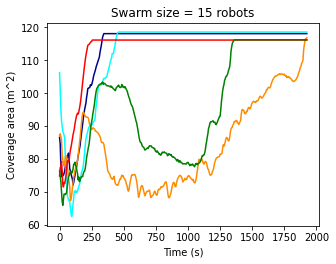

In [12]:
# pal=["pink","cyan","orange","red","green"]
pal=["darkblue","cyan","darkorange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm size = 15 robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("Coverage area (m^2)",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=coverage_result_final[1],x='Time',y='area',ci=None,color=pal[0],legend=None)
sns.lineplot(data=coverage_result_final[2],x='Time',y='area',ci=None,color=pal[1],legend=None)
sns.lineplot(data=coverage_result_final[3],x='Time',y='area',ci=None,color=pal[2],legend=None)
sns.lineplot(data=coverage_result_final[4],x='Time',y='area',ci=None,color=pal[3],legend=None)
sns.lineplot(data=coverage_result_final[5],x='Time',y='area',ci=None,color=pal[4],legend=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/15_line_coverage_area.pdf", dpi=600, format="pdf", transparent=False)

In [13]:
coverage_result_final = np.zeros(6,dtype=object)
max_val = 0
for o in range(1,6):
    coverage_result = pd.DataFrame()
    fname = "/home/somz/results_cc/pos_line_30_" +str(o)+".txt"
    # print(fname)
    data = pd.read_csv(fname, sep=",", header=None)
    range_rab = 2.5
    circles = []

    name = get_names_f(30)
    data = pd.read_csv(fname, names=name,sep=",", header=None)
    df = pd.DataFrame(data=data)
    df2 = pd.DataFrame(data=data)
    # print(df2.shape[0])
    # print(df)
    df.drop('time', axis=1, inplace=True)
    df.drop('seed', axis=1, inplace=True)
    df.drop('no_of_robots', axis=1, inplace=True)
    df.drop(df.filter(regex='id').columns, axis=1, inplace=True)


    positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([tuple(i) for i in x.values]))
    shape = positionalDf.shape

    for l in range(0,int(df2.shape[0]),50):
        
        circles = []
        for j in range(30):
            circles.append(Circle(positionalDf[j][l][0],positionalDf[j][l][1],range_rab))
        x_min_r = [c.x - c.r for c in circles]
        x_max_r = [c.x + c.r for c in circles]
        y_min_r = [c.y - c.r for c in circles]
        y_max_r = [c.y + c.r for c in circles]

        x_min = min(x_min_r)
        # print(x_max_r)
        x_max = max(x_max_r)
        y_min = min(y_min_r)
        y_max = max(y_max_r)
 
        box_side = 100
 
        dx = (x_max - x_min) / box_side
        dy = (y_max - y_min) / box_side
 
        count = 0
 
        for r in range(box_side):
            y = y_min + r * dy
            for c in range(box_side):
                x = x_min + c * dx
                if any((x-circle.x)**2 + (y-circle.y)**2 <= (circle.r ** 2)
                    for circle in circles):
                    count += 1
        
        coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
    if (max_val < coverage_result.shape[0]):
        max_val = coverage_result.shape[0]
        max_df = coverage_result
    coverage_result_final[o] = coverage_result

for o in range(1,6):
    if (max_val - coverage_result_final[o].shape[0]) > 0:
        length = max_val - coverage_result_final[o].shape[0]
        coverage_result_final[o] = pd.concat([coverage_result_final[o],pd.concat([coverage_result_final[o][-1:]]*length)])
        # print(max_df["Time"])
        coverage_result_final[o]["Time"] = max_df["Time"].values
        coverage_result_final[o]  = coverage_result_final[o].reset_index(drop=True)

# coverage_result_final = pd.concat(coverage_result_final[1:6])
    

/tmp/ipykernel_32454/3505410996.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/3505410996.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/3505410996.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":30,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/3505410996.py:57: FutureWarning: The frame.append method is depr

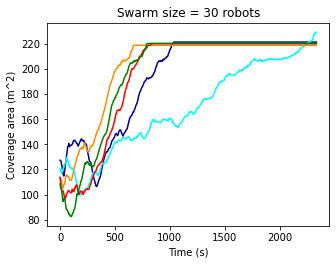

In [14]:
# pal=["pink","cyan","orange","red","green"]
pal=["darkblue","cyan","darkorange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm size = 30 robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("Coverage area (m^2)",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=coverage_result_final[1],x='Time',y='area',ci=None,color=pal[0],legend=None)
sns.lineplot(data=coverage_result_final[2],x='Time',y='area',ci=None,color=pal[1],legend=None)
sns.lineplot(data=coverage_result_final[3],x='Time',y='area',ci=None,color=pal[2],legend=None)
sns.lineplot(data=coverage_result_final[4],x='Time',y='area',ci=None,color=pal[3],legend=None)
sns.lineplot(data=coverage_result_final[5],x='Time',y='area',ci=None,color=pal[4],legend=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/30_line_coverage_area.pdf", dpi=600, format="pdf", transparent=False)

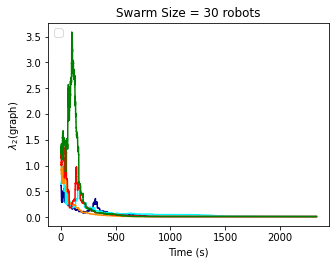

In [15]:

f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 30 robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("$\lambda_2$(graph) ",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


result[1] = pd.concat(final_df[1][1:6])
result[1] = result[1].reset_index(drop=True)
sns.lineplot(data=result[1],x='time',y='lambda2_graph',ci=None,hue='seed',palette=pal,legend=None)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:6], ['initial condition-1','initial condition-2','initial condition-3','initial condition-4','initial condition-5'],loc="upper left",framealpha=0.7,fontsize=11)

plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/30_line_lambda2_graph.pdf", dpi=600, format="pdf", transparent=False)



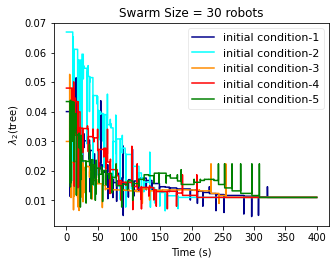

In [16]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 30 robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("$\lambda_2$(tree)",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


for i in range(1,6):
     final_df[1][i].drop(final_df[1][i][(final_df[1][i]['lambda2_tree'] < 0) | (final_df[1][i]['time'] > 400)  ].index,inplace=True)
     legend = str(i) + "-" + "seed"

result[1] = pd.concat(final_df[1][1:6])
result[1] = result[1].reset_index(drop=True)
sns.lineplot(data=result[1],x='time',y='lambda2_tree',ci=None,hue='seed',palette=pal,ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:6],['initial condition-1','initial condition-2','initial condition-3','initial condition-4','initial condition-5'] ,loc="upper right",framealpha=0.4,fontsize=11)

plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/30_line_lambda2_tree.pdf", dpi=600, format="pdf", transparent=False)



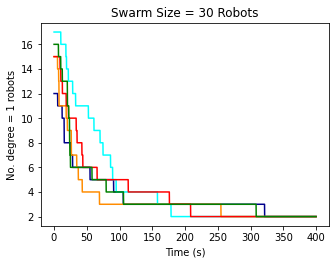

In [17]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 30 Robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("No. degree = 1 robots",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)

sns.lineplot(data=result[1],x='time',y='numones',ci=None,hue='seed',palette=pal,legend=None)
# ax.set(xlabel=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/30_line_numones.pdf", dpi=600, format="pdf", transparent=False)



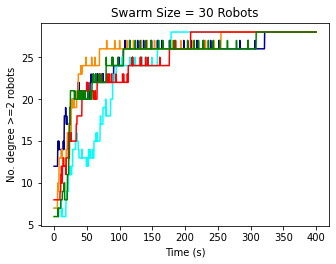

In [19]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 30 Robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("No. degree >=2 robots",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=result[1],x='time',y='numtwoes',ci=None,hue='seed',palette=pal,legend=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/30_line_numtwoes.pdf", dpi=600, format="pdf", transparent=False)



In [22]:
pal=["darkblue","cyan","darkorange","red","green"]

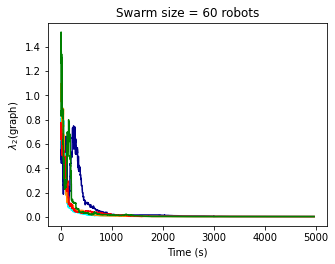

In [23]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm size = 60 robots")

result[2] = pd.concat(final_df[2][1:6])
result[2] = result[2].reset_index(drop=True)

sns.lineplot(data=result[2],x='time',y='lambda2_graph',ci=None,hue='seed',palette=pal,ax=ax,legend=None)

# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:5], ['run-0','run-1','run-2','run-3','run-4'],loc="upper left",framealpha=0.7,fontsize=11)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("$\lambda_2$(graph) ",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)

plt.tight_layout(pad=0.1)

plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/60_line_lambda2_graph.pdf", dpi=600, format="pdf", transparent=False)



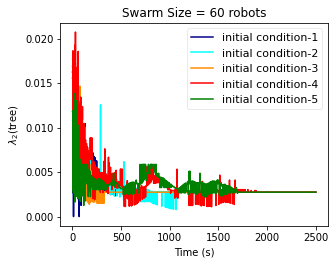

In [24]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 60 robots")
ax.set_ylabel("$\lambda_2$(tree)",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)

for i in range(1,6):
     final_df[2][i].drop(final_df[2][i][(final_df[2][i]['lambda2_tree'] <= 0) | (final_df[2][i]['time'] >= 2500) ].index,inplace=True)
     # legend = str(i) + "-" + "seed"


result[2] = pd.concat(final_df[2][1:6])
result[2] = result[2].reset_index(drop=True)
sns.lineplot(data=result[2],x='time',y='lambda2_tree',ci=None,hue='seed',palette=pal,ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:6],['initial condition-1','initial condition-2','initial condition-3','initial condition-4','initial condition-5'] ,loc="upper right",framealpha=0.4,fontsize=11)


plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 



plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/60_line_lambda2_tree.pdf", dpi=600, format="pdf", transparent=False)
    


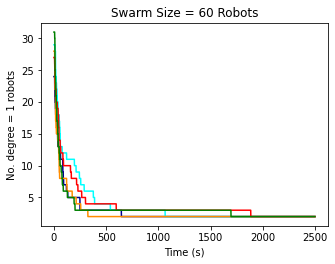

In [25]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm Size = 60 Robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("No. degree = 1 robots",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=result[2],x='time',y='numones',ci=None,hue='seed',palette=pal,legend=None)
# ax.set(xlabel=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/60_line_numones.pdf", dpi=600, format="pdf", transparent=False)



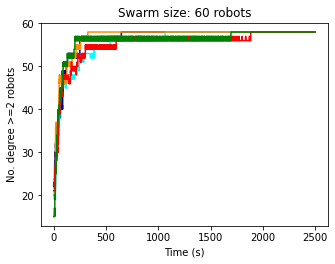

In [28]:
# pal=["pink","cyan","orange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm size: 60 robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("No. degree >=2 robots",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=result[2],x='time',y='numtwoes',ci=None,hue='seed',palette=pal,legend=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/60_line_numtwoes.pdf", dpi=600, format="pdf", transparent=False)



In [30]:
coverage_result_final = np.zeros(6,dtype=object)
max_val = 0
for o in range(1,6):
    coverage_result = pd.DataFrame()
    fname = "/home/somz/results_cc/pos_line_60_" +str(o)+".txt"
    # print(fname)
    data = pd.read_csv(fname, sep=",", header=None)
    range_rab = 2.5
    circles = []

    name = get_names_f(60)
    data = pd.read_csv(fname, names=name,sep=",", header=None)
    df = pd.DataFrame(data=data)
    df2 = pd.DataFrame(data=data)
    # print(df2.shape[0])
    # print(df)
    df.drop('time', axis=1, inplace=True)
    df.drop('seed', axis=1, inplace=True)
    df.drop('no_of_robots', axis=1, inplace=True)
    df.drop(df.filter(regex='id').columns, axis=1, inplace=True)


    positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([tuple(i) for i in x.values]))
    shape = positionalDf.shape

    for l in range(0,int(df2.shape[0]),50):
        
        circles = []
        for j in range(60):
            circles.append(Circle(positionalDf[j][l][0],positionalDf[j][l][1],range_rab))
        x_min_r = [c.x - c.r for c in circles]
        x_max_r = [c.x + c.r for c in circles]
        y_min_r = [c.y - c.r for c in circles]
        y_max_r = [c.y + c.r for c in circles]

        x_min = min(x_min_r)
        # print(x_max_r)
        x_max = max(x_max_r)
        y_min = min(y_min_r)
        y_max = max(y_max_r)
 
        box_side = 100
 
        dx = (x_max - x_min) / box_side
        dy = (y_max - y_min) / box_side
 
        count = 0
 
        for r in range(box_side):
            y = y_min + r * dy
            for c in range(box_side):
                x = x_min + c * dx
                if any((x-circle.x)**2 + (y-circle.y)**2 <= (circle.r ** 2)
                    for circle in circles):
                    count += 1
        
        coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":60,"seed":o,"area":count * dx * dy}, ignore_index = True)
    if (max_val < coverage_result.shape[0]):
        max_val = coverage_result.shape[0]
        max_df = coverage_result
    coverage_result_final[o] = coverage_result

for o in range(1,6):
    if (max_val - coverage_result_final[o].shape[0]) > 0:
        length = max_val - coverage_result_final[o].shape[0]
        coverage_result_final[o] = pd.concat([coverage_result_final[o],pd.concat([coverage_result_final[o][-1:]]*length)])
        # print(max_df["Time"])
        coverage_result_final[o]["Time"] = max_df["Time"].values
        coverage_result_final[o]  = coverage_result_final[o].reset_index(drop=True)

/tmp/ipykernel_32454/2657393911.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":60,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/2657393911.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":60,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/2657393911.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coverage_result = coverage_result.append({"Time":l/10,"number_of_robots":60,"seed":o,"area":count * dx * dy}, ignore_index = True)
/tmp/ipykernel_32454/2657393911.py:57: FutureWarning: The frame.append method is depr

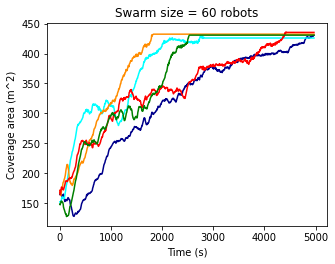

In [31]:
# pal=["pink","cyan","orange","red","green"]
pal=["darkblue","cyan","darkorange","red","green"]
f, ax = plt.subplots(figsize=(4.5,3.5))
plt.title("Swarm size = 60 robots")

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

ax.set_ylabel("Coverage area (m^2)",fontsize=10)
ax.set_xlabel("Time (s)",fontsize=10)


sns.lineplot(data=coverage_result_final[1],x='Time',y='area',ci=None,color=pal[0],legend=None)
sns.lineplot(data=coverage_result_final[2],x='Time',y='area',ci=None,color=pal[1],legend=None)
sns.lineplot(data=coverage_result_final[3],x='Time',y='area',ci=None,color=pal[2],legend=None)
sns.lineplot(data=coverage_result_final[4],x='Time',y='area',ci=None,color=pal[3],legend=None)
sns.lineplot(data=coverage_result_final[5],x='Time',y='area',ci=None,color=pal[4],legend=None)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/60_line_coverage_area.pdf", dpi=600, format="pdf", transparent=False)

In [37]:
fgraph_time_df = exp_done[exp_done['experiment_done'] == 1]
fgraph_time_df = fgraph_time_df.reset_index(drop=True)

final = pd.concat([df2,fgraph_time_df])
final = final.reset_index(drop=True)

,time,seed,no_of_robots,id:0,x_0,y_0,id:1,x_1,y_1,id:2,...,id:59,x_59,y_59,numones,numtwoes,lambda2_tree,lambda2_graph,tree_done,experiment_done,number_of_robot
0,1.0,5,60.0,0.0,0.0,0.0,1.0,1.04308,1.61534,2.0,...,59.0,-3.63575,-3.01217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,5,60.0,0.0,0.0,0.0,1.0,1.04308,1.61534,2.0,...,59.0,-3.63575,-3.01217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,5,60.0,0.0,0.0,0.0,1.0,1.04308,1.61534,2.0,...,59.0,-3.63112,-3.00549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,5,60.0,0.0,0.0,0.0,1.0,1.04308,1.61534,2.0,...,59.0,-3.62459,-2.99793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5,60.0,0.0,0.0,0.0,1.0,1.04308,1.61534,2.0,...,59.0,-3.61717,-2.99124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25403,4973.2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,58.0,0.002741,0.002741,1.0,1.0,60.0
25404,2815.7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,58.0,0.002741,0.002741,1.0,1.0,60.0
25405,1844.3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,58.0,0.002741,0.002741,1.0,1.0,60.0
25406,4434.1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,58.0,0.002741,0.002741,1.0,1.0,60.0


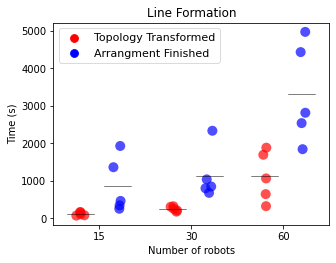

In [38]:
dx="number_of_robot"
dy="time"
dhue="experiment_done"
pal=["red","blue"]
data = final

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Line Formation")


sns.stripplot(x=dx, 
              y=dy, 
              hue=dhue, 
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], ['Topology Transformed','Arrangment Finished'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

In [5]:
def get_names_f(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('x_'+str(k))
        n.append('y_'+str(k))
    return n

 bots:  59 [(-40.4386, 3.59766), (-7.1328, -19.7462), (4.17279, -32.1503), (-19.1617, -9.50442), (-16.7706, -10.8948), (-21.4809, -7.95952), (-1.397, -25.8575), (-4.22295, -22.7678), (15.5248, -44.5715), (-3.21118, -23.7415), (18.5459, -47.7233), (-15.8566, -11.9593), (5.10359, -33.1996), (-0.460938, -26.8928), (16.4983, -45.6028), (-2.20493, -24.7116), (12.6098, -41.5312), (-9.751, -16.7413), (-12.6458, -14.091), (-5.20807, -21.7758), (-36.1379, 1.53162), (19.6084, -48.7986), (-29.4734, -2.17839), (1.41811, -28.9801), (-8.58161, -17.4998), (11.7106, -40.4543), (6.05215, -34.2367), (-20.3902, -8.82815), (-33.3788, 0.0844144), (-28.2485, -2.94824), (-10.217, -15.4155), (3.30533, -31.0546), (-23.6863, -6.24023), (-25.9158, -4.54579), (-30.7395, -1.41426), (-32.0433, -0.657189), (13.5765, -42.5528), (7.94653, -36.3103), (9.86078, -38.3502), (-6.13268, -20.7265), (14.5554, -43.5577), (-24.7904, -5.37988), (17.508, -46.6566), (-37.5536, 2.23383), (20.6936, -49.8797), (-8.21987, -18.8554), (

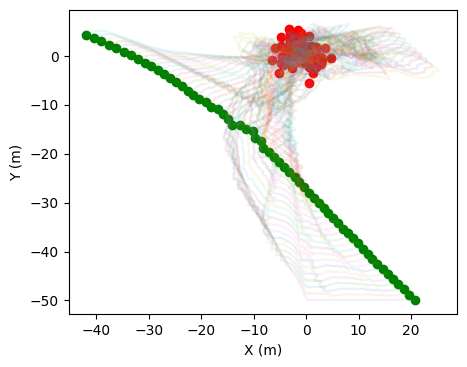

In [92]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

robots = 60
type = "line"
seed = 4
fname = "/home/somz/results_cc/pos_"+str(type)+"_"+str(robots)+"_"+str(seed)+".txt"
data = pd.read_csv(fname, sep=",", header=None)

name = get_names_f(robots)
data = pd.read_csv(fname, names=name,sep=",", header=None)
df = pd.DataFrame(data=data)
df2 = df
# print(df2.shape)

df.drop('time', axis=1, inplace=True)
df.drop('seed', axis=1, inplace=True)
df.drop('no_of_robots', axis=1, inplace=True)
df.drop(df.filter(regex='id').columns, axis=1, inplace=True)

# Take every 3 cols (xyz) and combine into tuples (https://stackoverflow.com/questions/34052001/grouping-a-dataframe-and-applying-tuple)
positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([tuple(i) for i in x.values]))
shape = positionalDf.shape
print(" bots: ", shape[1]-1, end =" ")

f, axis = plt.subplots(figsize=(4.5,3.5))
# axis = plt.axes(xlim =(-15, 26),  
#                 ylim =(-15, 28))
# plt.style.use("default")

positions_start = positionalDf[0:0+1].to_numpy().tolist()[0]
positions_final = positionalDf[df2.shape[0]-1:df2.shape[0]].to_numpy().tolist()[0]
print(positions_final)

 


intial_sheep_scat = axis.scatter(*( list(zip(*positions_start) )), color='red')
for i in range(0,robots):
    x = "x_"+str(i)
    y = "y_"+str(i)
    axis.plot(df2[x],df2[y],alpha=0.1)
final_sheep_scat = axis.scatter(*( list(zip(*positions_final) )), color='green')


axis.set_ylabel("Y (m)",fontsize=10)
axis.set_xlabel("X (m)",fontsize=10)
plt.tight_layout(pad=0.1)
plt.savefig("/home/somz/connectivity/local-operations-on-trees/images/"+str(robots)+"_"+str(type)+"_traj.pdf", dpi=600, format="pdf", transparent=False)
plt.show()
    


In [78]:
results

NameError: name 'results' is not defined

In [103]:
final_df[0][seed-1]

,time,numones,numtwoes,lambda2_tree,lambda2_graph,tree_done,experiment_done,seed,number_of_robot
0,0.1,6,7,0.124834,1.677570,0,0,4,15
1,0.2,6,7,0.124834,1.677570,0,0,4,15
2,0.3,6,7,0.124834,1.677570,0,0,4,15
3,0.4,6,7,0.124834,1.677570,0,0,4,15
4,0.5,6,7,0.124834,1.481660,0,0,4,15
...,...,...,...,...,...,...,...,...,...
19295,1929.6,2,13,0.043705,0.043705,1,1,4,15
19296,1929.7,2,13,0.043705,0.043705,1,1,4,15
19297,1929.8,2,13,0.043705,0.043705,1,1,4,15
19298,1929.9,2,13,0.043705,0.043705,1,1,4,15


/tmp/ipykernel_89215/4267181103.py:77: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax10.set_xlim([0, t*100])
/tmp/ipykernel_89215/4267181103.py:78: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax11.set_xlim([0, t*100])
/tmp/ipykernel_89215/4267181103.py:79: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax12.set_xlim([0, t*100])
/tmp/ipykernel_89215/4267181103.py:80: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax13.set_xlim([0, t*100])
/tmp/ipykernel_89215/4267181103.py:77: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax10.set_xlim([0, t*100])
/tmp/ipykernel_89215/4267181103.py:78: UserWarning: Att

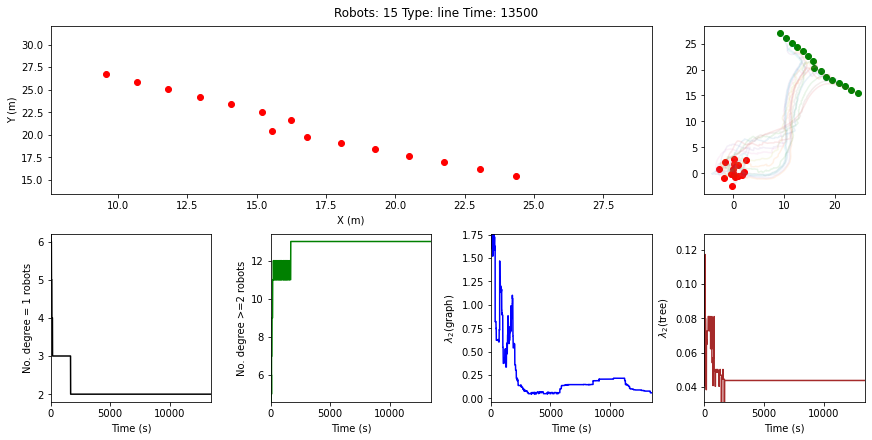

In [114]:
robots = 15
type = "line"
seed = 5
fname = "/home/somz/connectivity/results_cc/pos_"+str(type)+"_"+str(robots)+"_"+str(seed)+".txt"
data = pd.read_csv(fname, sep=",", header=None)

name = get_names_f(robots)
data = pd.read_csv(fname, names=name,sep=",", header=None)
df = pd.DataFrame(data=data)
df2 = df


df.drop('time', axis=1, inplace=True)
df.drop('seed', axis=1, inplace=True)
df.drop('no_of_robots', axis=1, inplace=True)
df.drop(df.filter(regex='id').columns, axis=1, inplace=True)

positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([tuple(i) for i in x.values]))
shape = positionalDf.shape

fig = plt.figure(figsize=(12, 6), constrained_layout=True)

spec = fig.add_gridspec(2, 4)
ax00 = fig.add_subplot(spec[0, 0:3])
ax00.set_ylabel("Y (m)",fontsize=10)
ax00.set_xlabel("X (m)",fontsize=10)
ax01 = fig.add_subplot(spec[0, 3])
ax01.set_ylabel("Y (m)",fontsize=10)
ax01.set_xlabel("X (m)",fontsize=10)
ax10 = fig.add_subplot(spec[1, 0])
ax10.set_ylabel("No. degree = 1 robots",fontsize=10)
ax10.set_xlabel("Time (s)",fontsize=10)
ax11 = fig.add_subplot(spec[1, 1])
ax11.set_ylabel("No. degree >=2 robots",fontsize=10)
ax11.set_xlabel("Time (s)",fontsize=10)
ax12 = fig.add_subplot(spec[1, 2])
ax12.set_ylabel("$\lambda_2$(graph) ",fontsize=10)
ax12.set_xlabel("Time (s)",fontsize=10)
ax13 = fig.add_subplot(spec[1, 3])
ax13.set_ylabel("$\lambda_2$(tree)",fontsize=10)
ax13.set_xlabel("Time (s)",fontsize=10)


line_numones,  = ax10.plot(final_df[0][seed-1]['time']*10,final_df[0][seed-1]['numones'],color='black')
line_numtwoes, = ax11.plot(final_df[0][seed-1]['time']*10,final_df[0][seed-1]['numtwoes'],color='green')                  
line_lambda2_graph, = ax12.plot(final_df[0][seed-1]['time']*10,final_df[0][seed-1]['lambda2_graph'],color='blue')
line_lambda2_tree,  = ax13.plot(final_df[0][seed-1]['time']*10,final_df[0][seed-1]['lambda2_tree'],color='brown')


positions_start = positionalDf[0:0+1].to_numpy().tolist()[0]
positions_final = positionalDf[df2.shape[0]-1:df2.shape[0]].to_numpy().tolist()[0]
intial_sheep_scat_dynamic = ax00.scatter(*(list(zip(*positions_start))), color='red')
intial_sheep_scat_static = ax01.scatter(*(list(zip(*positions_start))), color='red')
final_sheep_scat = ax01.scatter(*( list(zip(*positions_final) )), color='green')

def animate(t):

    positions = positionalDf[t*100:t*100+1].to_numpy().tolist()[0]
    (x,y) = list(zip(*positions))
    positions = [x[0:2] for x in positions]
    intial_sheep_scat_dynamic.set_offsets(positions)
    
    ax01.clear()
    intial_sheep_scat_static = ax01.scatter(*(list(zip(*positions_start))), color='red')
    final_sheep_scat = ax01.scatter(*( list(zip(*positions_final) )), color='green')
    
    for i in range(0,robots):
        x_1 = "x_"+str(i)
        y_1 = "y_"+str(i)
        ax01.plot(df2[x_1][0:t*100],df2[y_1][0:t*100],alpha=0.1)
    
    line_numones.set_data(final_df[0][seed]['time'][0:t*100]*10,final_df[0][seed]['numones'][0:t*100])
    line_numtwoes.set_data(final_df[0][seed]['time'][0:t*100]*10,final_df[0][seed]['numtwoes'][0:t*100])
    line_lambda2_graph.set_data(final_df[0][seed]['time'][0:t*100]*10,final_df[0][seed]['lambda2_graph'][0:t*100])
    line_lambda2_tree.set_data(final_df[0][seed]['time'][0:t*100]*10,final_df[0][seed]['lambda2_tree'][0:t*100])
    
    ax10.set_xlim([0, t*100])
    ax11.set_xlim([0, t*100])
    ax12.set_xlim([0, t*100])
    ax13.set_xlim([0, t*100])
    
    ax00.set_xlim([min(x) - 2, max(x)*1.2])
    ax00.set_ylim([min(y) - 2, max(y)*1.2])
    fig.suptitle("Robots: "+str(robots)+" Type: "+str(type)+" Time: "+str(t*100), fontsize=12)

positions_over_time = animation.FuncAnimation(fig, animate, interval=500, frames=int(df2.shape[0]/100), cache_frame_data=False)
positions_over_time.save(str(robots)+"_"+str(type)+'_positions.mp4')



